In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import cv2
import imghdr

C:\Users\janit\AppData\Local\Temp\ipykernel_12444\3721952470.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Remove Doggy Images

In [4]:
data_dir = 'Data'

In [5]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Isssue with image {}'.format(image_path))
            # os.remove(image_path)

Isssue with image Data\Anthracnose\.ipynb_checkpoints


In [7]:
# Data Loading

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 886 files belonging to 8 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
# Images as Numpy Arrays
batch[0].shape

(32, 256, 256, 3)

In [12]:
batch[1]

array([4, 2, 1, 4, 6, 0, 1, 7, 6, 3, 1, 4, 6, 5, 7, 7, 7, 3, 3, 4, 0, 4,
       3, 6, 6, 0, 5, 6, 7, 1, 3, 0])

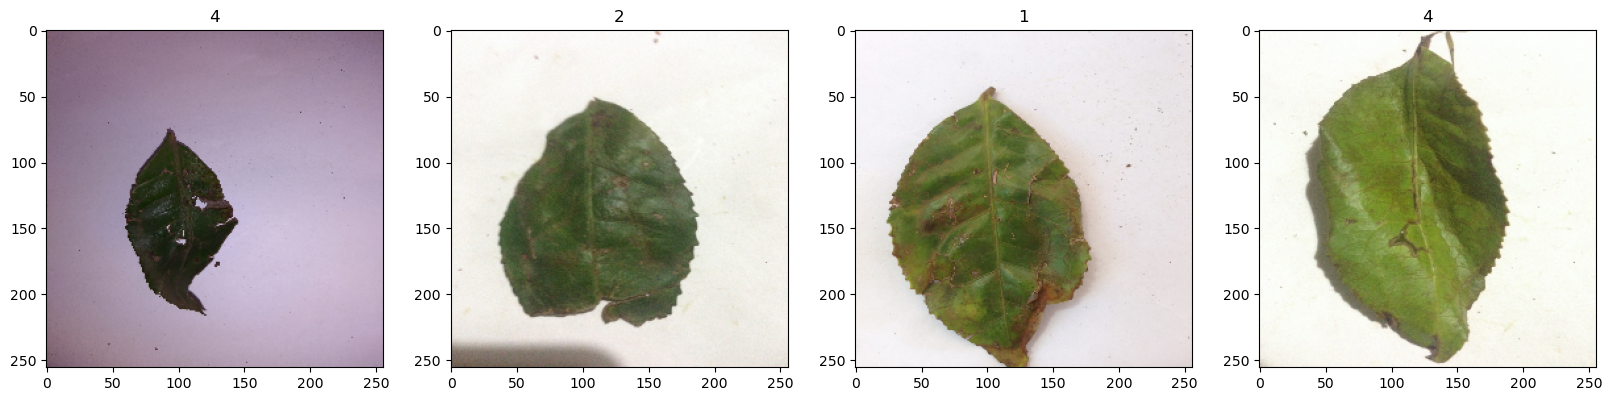

In [13]:
# Create a figure and an array of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))  # Adjust rows as needed

# Plot images
for idx, img in enumerate(batch[0][::8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [14]:
# Preprocess The Data

In [15]:
# 2.1 Scale the data

In [16]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [17]:
scaled_iterator = scaled_data.as_numpy_iterator()

In [18]:
scaled_batch = scaled_iterator.next()

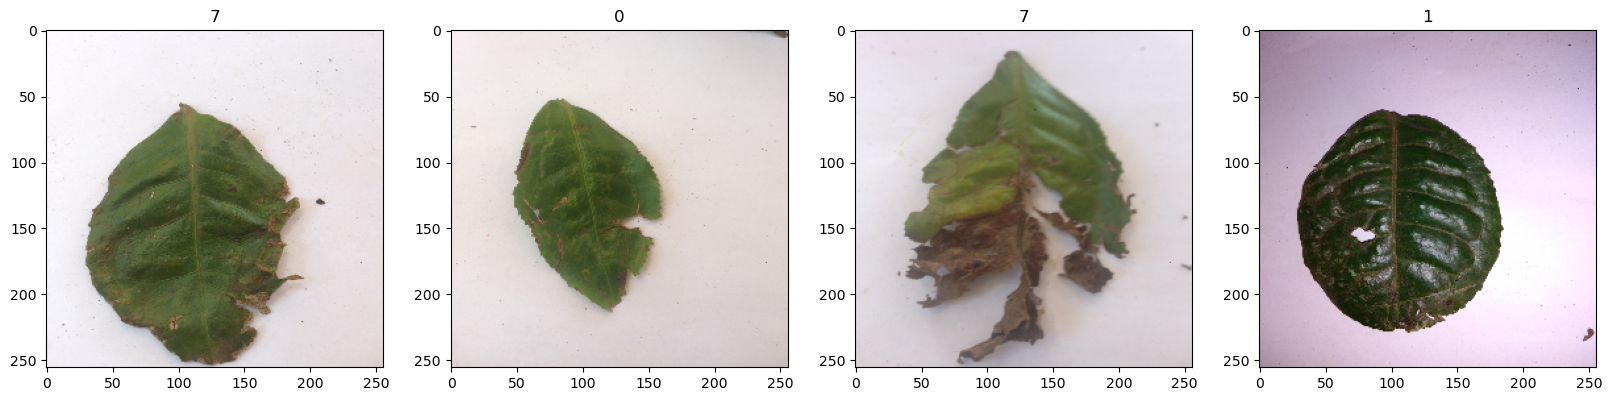

In [19]:
# Create a figure and an array of subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))  # Adjust rows as needed

# Plot images
for idx, img in enumerate(scaled_batch[0][::8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])


In [20]:
# 2.2 Split Data

In [21]:
# Assisgn Sizes for Train, Validation and Testing
train_size =  int(len(scaled_data)*.7)
val_size =  int(len(scaled_data)*.2)+1
test_size =  int(len(scaled_data)*.1)+1

In [22]:
train = data.take(train_size)
val = data.take(val_size)
test = data.take(test_size)

In [23]:
# 3 Build Deep Learning Nural Network

In [24]:
# 3.1 Build the model

In [25]:
# Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,620,497 (6.18 MB)

 Trainable params: 1,620,497 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train The Data